/Users/maryam/anaconda3/envs/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


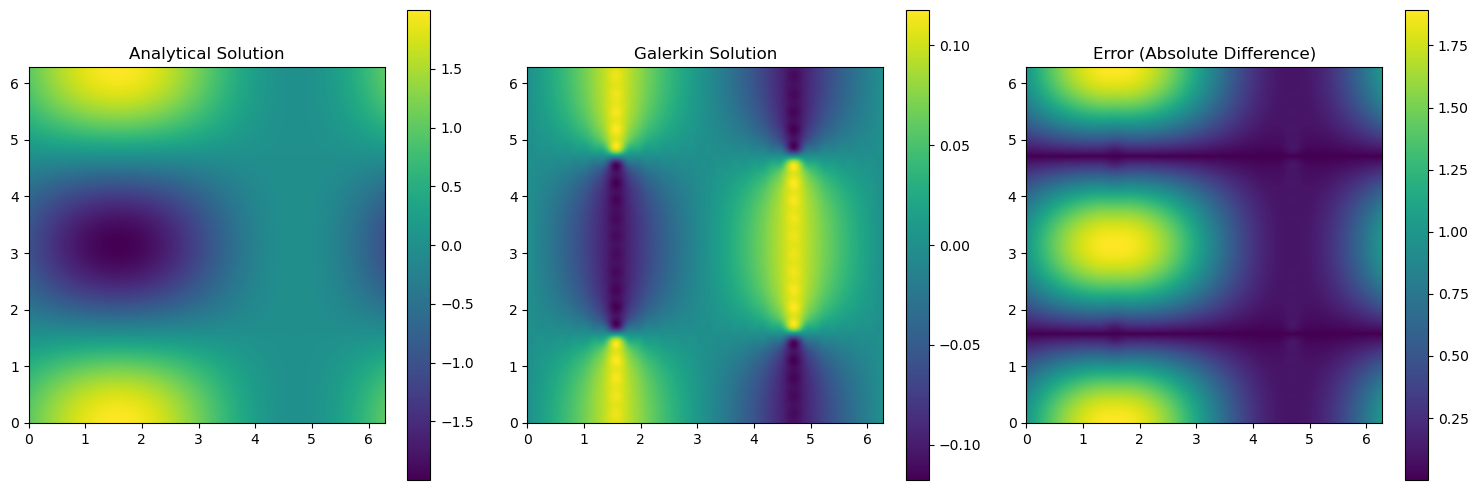

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the analytical solution for the Klein-Gordon equation
def analytical_solution(x, t):
    return (1 + np.sin(x)) * np.cos(t)

# Define the neural network model
class KleinGordonNN(nn.Module):
    def __init__(self):
        super(KleinGordonNN, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the Galerkin method for solving the Klein-Gordon equation
def galerkin_solution(x, t, modes=20):
    solution = np.zeros_like(x)
    for n in range(1, modes + 1):
        for m in range(1, modes + 1):
            C_nm = 2 * np.sin(n * np.pi / 2) * np.sin(m * np.pi / 2)
            eigenvalue = (n ** 2 + m ** 2) * np.pi ** 2
            solution += C_nm * np.sin(n * x) * np.cos(m * t) / eigenvalue
    return solution

# Define the resolution of the grid
num_points_x = 500
num_points_t = 500

# Increase the plotting range (adjust as needed)
x_values = np.linspace(0, 2 * np.pi, num_points_x)
t_values = np.linspace(0, 2 * np.pi, num_points_t)

# Create a grid of (x, t) values
grid_x, grid_t = np.meshgrid(x_values, t_values)

# Compute the analytical solution on the grid
analytical_values = analytical_solution(grid_x, grid_t)

# Compute the Galerkin solution on the grid
galerkin_values = galerkin_solution(grid_x, grid_t)

# Plot the analytical solution, Galerkin solution, and the error
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(analytical_values, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Analytical Solution')
plt.colorbar()

plt.subplot(132)
plt.imshow(galerkin_values, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Galerkin Solution')
plt.colorbar()

plt.subplot(133)
error_galerkin = np.abs(analytical_values - galerkin_values)
plt.imshow(error_galerkin, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Error (Absolute Difference)')
plt.colorbar()

plt.tight_layout()
plt.show()


/Users/maryam/anaconda3/envs/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


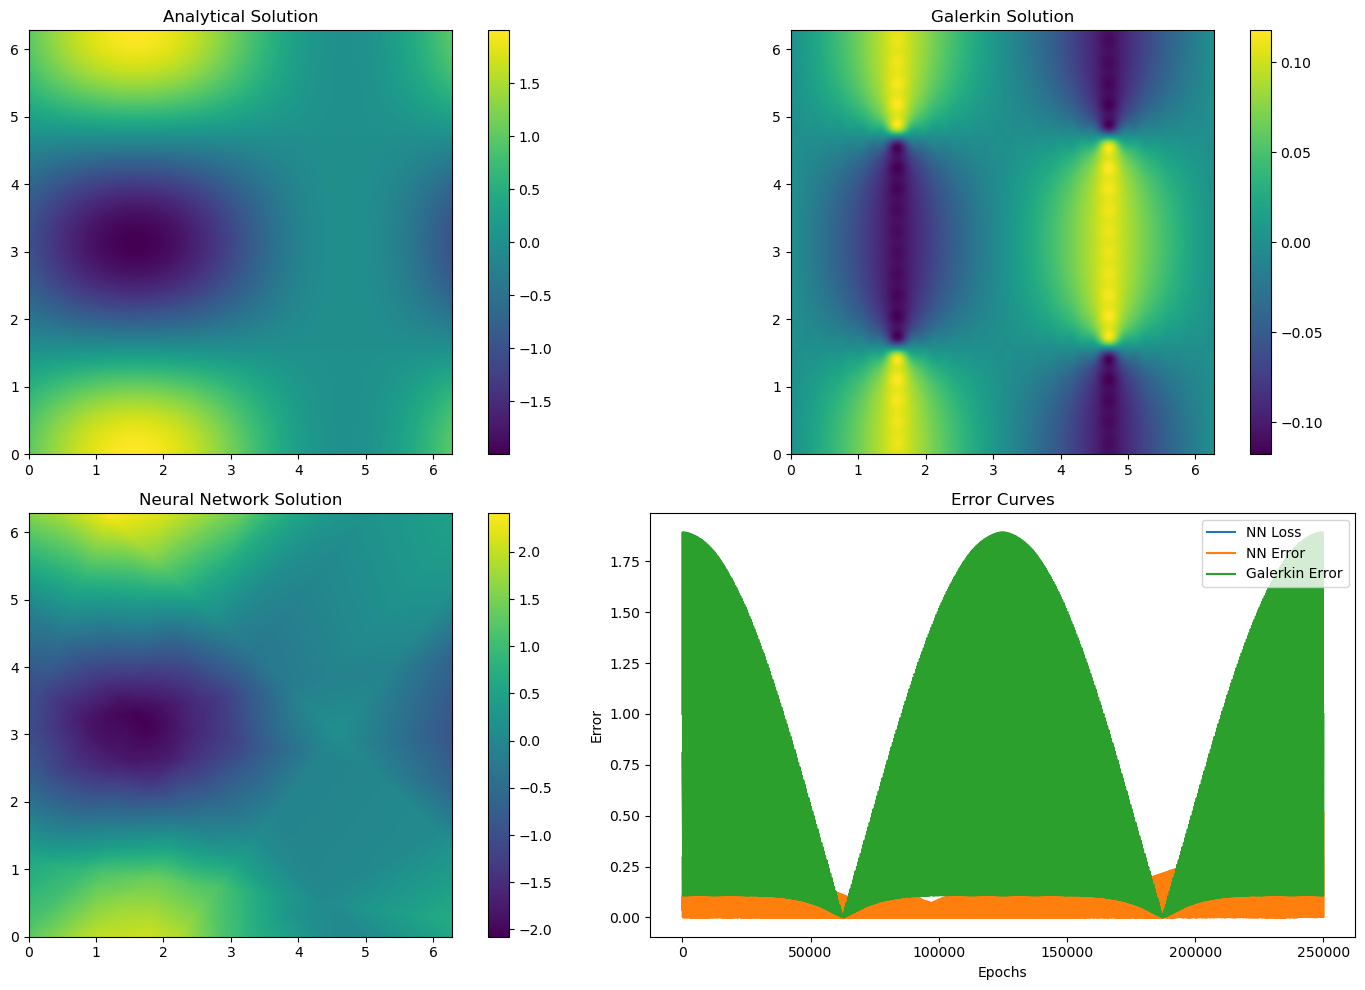

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the analytical solution for the Klein-Gordon equation
def analytical_solution(x, t):
    return (1 + np.sin(x)) * np.cos(t)

# Define the neural network model
class KleinGordonNN(nn.Module):
    def __init__(self):
        super(KleinGordonNN, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the Galerkin method for solving the Klein-Gordon equation
def galerkin_solution(x, t, modes=20):
    solution = np.zeros_like(x)
    for n in range(1, modes + 1):
        for m in range(1, modes + 1):
            C_nm = 2 * np.sin(n * np.pi / 2) * np.sin(m * np.pi / 2)
            eigenvalue = (n ** 2 + m ** 2) * np.pi ** 2
            solution += C_nm * np.sin(n * x) * np.cos(m * t) / eigenvalue
    return solution

# Define the resolution of the grid
num_points_x = 500
num_points_t = 500

# Increase the plotting range (adjust as needed)
x_values = np.linspace(0, 2 * np.pi, num_points_x)
t_values = np.linspace(0, 2 * np.pi, num_points_t)

# Create a grid of (x, t) values
grid_x, grid_t = np.meshgrid(x_values, t_values)

# Convert the grid to a tensor
inputs = torch.Tensor(np.vstack((grid_x.ravel(), grid_t.ravel())).T)

# Define the loss function
criterion = nn.MSELoss()

# Create the neural network model
net = KleinGordonNN()

# Training parameters
num_epochs = 5000
learning_rate = 0.001

# Define optimizer
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

# Lists to store losses for plotting
losses = []

# Training loop
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Forward pass
    predicted_output = net(inputs).view(grid_x.shape)
    
    # Calculate the loss
    loss = criterion(predicted_output, torch.Tensor(analytical_solution(grid_x, grid_t)))

    # Backward pass
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

# Convert the predicted output to a numpy array
predicted_values = predicted_output.detach().numpy()

# Compute the analytical solution on the grid
analytical_values = analytical_solution(grid_x, grid_t)

# Compute the Galerkin solution on the grid
galerkin_values = galerkin_solution(grid_x, grid_t)

# Plot the analytical solution, Galerkin solution, NN solution, and the error curves
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.imshow(analytical_values, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Analytical Solution')
plt.colorbar()

plt.subplot(222)
plt.imshow(galerkin_values, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Galerkin Solution')
plt.colorbar()

plt.subplot(223)
plt.imshow(predicted_values, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Neural Network Solution')
plt.colorbar()

plt.subplot(224)
error_nn = np.abs(analytical_values - predicted_values)
error_galerkin = np.abs(analytical_values - galerkin_values)
plt.plot(losses, label='NN Loss')
plt.plot(error_nn.flatten(), label='NN Error')
plt.plot(error_galerkin.flatten(), label='Galerkin Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error Curves')
plt.legend()

plt.tight_layout()
plt.show()


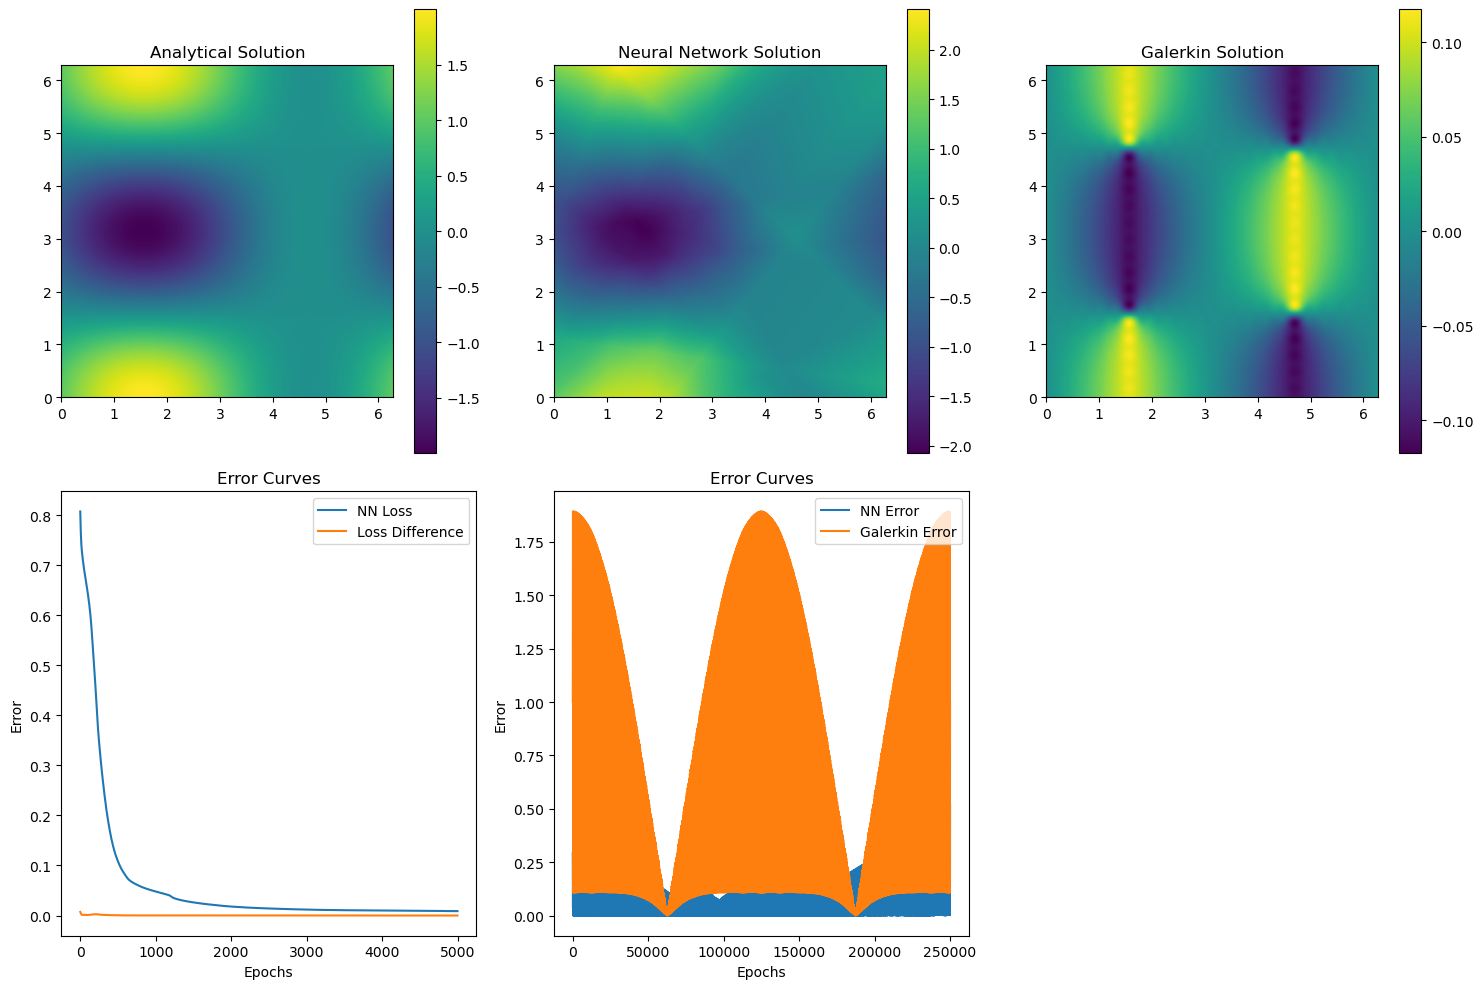

In [7]:
# Plot the analytical solution, Galerkin solution, NN solution, and the error curves
plt.figure(figsize=(15, 10))


plt.subplot(231)
plt.imshow(analytical_values, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Analytical Solution')
plt.colorbar()

plt.subplot(232)
plt.imshow(predicted_values, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Neural Network Solution')
plt.colorbar()

plt.subplot(233)
plt.imshow(galerkin_values, extent=[0, 2 * np.pi, 0, 2 * np.pi], origin='lower', cmap='viridis')
plt.title('Galerkin Solution')
plt.colorbar()




plt.subplot(234)
error_nn = np.abs(analytical_values - predicted_values)
error_galerkin = np.abs(analytical_values - galerkin_values)
plt.plot(losses, label='NN Loss')
plt.plot(np.abs(np.diff(losses)), label='Loss Difference')
# plt.plot(error_nn.flatten(), label='NN Error')
# plt.plot(error_galerkin.flatten(), label='Galerkin Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error Curves')
plt.legend()




plt.subplot(235)
error_nn = np.abs(analytical_values - predicted_values)
error_galerkin = np.abs(analytical_values - galerkin_values)
plt.plot(error_nn.flatten(), label='NN Error')
plt.plot(error_galerkin.flatten(), label='Galerkin Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error Curves')
plt.legend()

plt.tight_layout()
plt.show()